# Detecting patterns of speciation in the fossil record

In this assignment, we use data from the NOW (New and Old Worlds) database of fossil mammals to study patterns of speciation over time and space. In particular, we are interested to know when and where speciation rates have been significantly high. The task is to find which time periods and which places over the history of mammals have given rise to exceptionally high numbers of new species. The phenomenon is known in the evolutionary literature as the “species factory”. Palaeontologists are interested why and in which ways those times and places are special. The role of computational science is to identify and characterize such times and places.

We practice using pandas DataFrames, performing logistic regression and making statistical significance tests in data analysis.

## 1.1 Fossil data and the NOW database

Fossils are remains, traces or impressions of organisms that lived in the past, preserved in rocks. The NOW fossil mammal database contains global information about Cenozoic land mammal taxa (identifications of animals and their ancestral relationships to other animals) and localities (places on Earth where fossils are found). Cenozoic is the era that extends from 66 million years ago to the present day, that is, a time interval starting right after dinosaurs went extinct. Cenozoic is known as the Age of Mammals, because the extinction of many groups, including dinosaurs, allowed mammals to greatly diversify. The continents also moved into their current positions during this era.

The NOW database has been curated in Helsinki since 1993. The database keeps a record of global mammal fossil finds: it records geographic localities where mammalian fossils have been found around the world and for each locality there is a list of species that have been found there. The database includes an estimated age for each fossil locality. Information about fossil mammal species, characteristics of their appearance, behaviour and ways of life is also available. The data is free and open to use for anyone.

The database has been compiled over many years from information given in publications and from personal knowledge of domain experts. The database is alive, meaning that data is continuously updated and expanded to incorporate new discoveries. The database is curated by an international team of experts. However, fossil data is inherently uncertain. Taxonomic assignments as well as age estimates rely on opinions and interpretations of human experts.

There are different ways to estimate the age of a fossil. Typically, the age is assigned based on the age of the locality at which the fossil was found. One method to do this is through radiometric dating. This relies on the speed of radioactive decay of chemical elements and can tell age very precisely. The main challenge is that the sample must have remained a closed system, for
instance, due to a volcanic eruption, since the event being dated. Some continents and some time periods offer more possibilities for radiometric dating than others. The African fossil record, for instance, is quite well interleaved with volcanic layers, while the European fossil record – not so much. In the absence of other possibilities, relative dating is used to get age estimates.
This technique relies on common biological events, such as first and last occurrences of selected indicator species. Such dating is called biochronology: the age of a locality is estimated by comparing the faunal composition of the locality to known reference localities, for which exact ages are known via radiometric dating. Mammal Neogene (MN) time zones in Europe is a set of
such relative dating units. We will use those units in this analysis.

Global compilations of fossil data can be used for different types of analyses of the history of life, evolutionary processes and environmental contexts. The goal is not only to repicture ecosystems of the past from a highly fragmented record, but more so to reconstruct processes and drivers of changes in those ecosystems. The fundamental question that can be asked of such data is how life on Earth works.

## 1.2 Data preprocessing

This exercise will focus on analysis of how new species appear and how those patterns manifest in space and time. We will work with time intervals corresponding to the European MN zones. As part of the data preprocessing exercise we will need to map Asian and African fossil localities to these same units, so that we are working with one unified time frame. The next steps will guide you through preprocessing data before proceeding to computational analysis.

### Exercise 1.

Download data from the NOW database. Go to http://www.helsinki.fi/science/now/ Click “View Database”, then “Enter Database”, then “Locality” and then “Export”. Select “include species lists” and choose “Comma” for field separator. Then, click “All NOW localities”. Once download completes, copy all of the text on your browser and paste it into a new txt file. Save the file.

Once we have all of the raw data, we need to transform it into a more useful
format.

### Answer 1.

The database is downloaded and copied into the file "newoldworld.txt".

### Exercise 2.

Create a pandas DataFrame that contains all of the data and save it as a csv file. How many rows does the DataFrame contain?

In the DataFrame, each row represents one fossil occurrence. The columns LONG and LAT give the longitude and latitude, respectively, of where a given fossil occurrence was found. The columns MIN AGE and MAX AGE give an estimation of the age of the fossil (in millions of years). The column LIDNUM contains a unique identification number for each locality, where fossils have been found. The columns GENUS and SPECIES give information on the taxonomic identification of the fossil.

The modern modular system of naming organisms was invented by Carl Linnaeus in the 18th century. This system is exclusively used today. Within the scope of this exercise, it is important to know that a species is uniquely identified by a combination of the above two taxonomic ranks: genus and species. Neither rank alone uniquely defines a species, but their combination is sufficient. As a side note, a species name should always be written in italics, for example Canis lupus (the gray wolf), where Canis is the genus and lupus is the species.

Before we can begin to analyze the data properly, a number of cleaning and preprocessing steps are necessary.

### Answer 2.

In [37]:
import pandas as pd

df = pd.read_csv("newoldworld.txt", na_values="\\N", low_memory=False)
df.to_csv("fossildata.csv", index=False)

print(f"dataframe rows: {len(df)}")

dataframe rows: 85614


### Exercise 3. a)

Remove all rows where LAT = LONG = 0; these occurrences have incorrect coordinates. Drop rows where SPECIES is “sp.” or “indet.”; these occurrences have not been properly identified.

| name  |max    |min  |
|-------|-------|-----|
| MN1   |23     |21.7 |
| MN2   |21.7   |19.5 |
| MN3   |19.5   |17.2 |
| MN4   |17.2   |16.4 |
| MN5   |16.4   |14.2 |
| MN6   |14.2   |12.85|
| MN7-8 |12.85  |11.2 |
| MN9   |11.2   |9.9  |
| MN10  |9.9    |8.9  |
| MN11  |8.9    |7.6  |
| MN12  |7.6    |7.1  |
| MN13  |7.1    |5.3  |
| MN14  |5.3    |5    |
| MN15  |5      |3.55 |
| MN16  |3.55   |2.5  |
| MN17  |2.5    |1.9  |
| MQ18  |1.9    |0.85 |
| MQ19  |0.85   |0.01 |

Table 1: MN time unit boundaries (in millions of years ago). Note that MN7 and MN8 are combined into one time unit. This is a decision that scientists have made because of complications in separating the two units at popular fossil localities.

### Answer 3.a

In [38]:
filtdf = df[(df['LAT'] != 0) | (df['LONG'] != 0)]
filtdf = filtdf[~filtdf['SPECIES'].isin(['sp.', 'indet.'])]

print(f"normal row: {len(df)}")
print(f"filter row: {len(filtdf)}")
print(f"remove row: {len(df) - len(filtdf)}")

normal row: 85614
filter row: 63277
remove row: 22337


### Exercise 3. b)

Next we will assign each occurrence to a specific Mammal Neogene (MN) time unit. Table 1 shows the time boundaries of each time unit. Assign each occurrence to a correct time unit by calculating the mean of MIN AGE and MAX AGE. If the mean age of an occurrence is precisely on the boundary between two time units, assign the occurrence to the older time unit. If the mean age of an occurrence is outside of the MN time interval, assign it to a “pre-MN” or “post-MN” category.

### Answer 3.b

In [39]:
filtdf['MEAN_AGE'] = (filtdf['MAX_AGE'] + filtdf['MIN_AGE']) / 2

def givemntime(agemean):
    if agemean > 23:
        return "pre-MN"
    elif agemean >= 21.7:
        return "MN1"
    elif agemean >= 19.5:
        return "MN2"
    elif agemean >= 17.2:
        return "MN3"
    elif agemean >= 16.4:
        return "MN4"
    elif agemean >= 14.2:
        return "MN5"
    elif agemean >= 12.85:
        return "MN6"
    elif agemean >= 11.2:
        return "MN7-8"
    elif agemean >= 9.9:
        return "MN9"
    elif agemean >= 8.9:
        return "MN10"
    elif agemean >= 7.6:
        return "MN11"
    elif agemean >= 7.1:
        return "MN12"
    elif agemean >= 5.3:
        return "MN13"
    elif agemean >= 5.0:
        return "MN14"
    elif agemean >= 3.55:
        return "MN15"
    elif agemean >= 2.5:
        return "MN16"
    elif agemean >= 1.9:
        return "MN17"
    elif agemean >= 0.85:
        return "MQ18"
    elif agemean >= 0.01:
        return "MQ19"
    else:
        return "post-MN"

filtdf['MN_UNIT'] = filtdf['MEAN_AGE'].apply(givemntime)

print(filtdf['MN_UNIT'].value_counts())

MN_UNIT
pre-MN     11877
MQ19        8094
MQ18        5337
MN5         4413
MN4         3052
MN15        3035
MN7-8       2859
MN13        2781
MN3         2679
MN6         2275
MN17        2266
MN16        2250
MN12        2181
MN9         2001
MN11        1914
MN10        1726
post-MN     1603
MN2         1516
MN14         893
MN1          525
Name: count, dtype: int64


### Exercise 3. c)

Sometimes expert knowledge may be used to override some of the information recorded in the data. In our case, experts in palaeontology tell us that occurrences in the localities “Samos Main Bone Beds” and “Can Llobateres I” should be assigned to time units MN12 and MN9, respectively. Check these and if necessary, edit the time units to their correct values.

### Answer 3.c

In [40]:
samosrow = filtdf['NAME'].str.contains('Samos Main Bone Beds', case=False, na=False)
llobatrow = filtdf['NAME'].str.contains('Llobateres', case=False, na=False)

hassamos = samosrow.any()
hasllobat = llobatrow.any()

print("mn units, samos main bone beds now:")
if hassamos:
    print(filtdf.loc[samosrow, 'MN_UNIT'].unique())
else:
    print("no assignment")

print("\nmn units, can llobateres i now:")
if hasllobat:
    print(filtdf.loc[llobatrow, 'NAME'].unique())
    print(filtdf.loc[llobatrow, 'MN_UNIT'].unique())

if hassamos:
    filtdf.loc[samosrow, 'MN_UNIT'] = 'MN12'
    
if hasllobat:
    filtdf.loc[llobatrow, 'MN_UNIT'] = 'MN9'

print("\nupdated:")
print(f"samos main bone beds: {samosrow.sum()}")
print(f"changed can llobateres: {llobatrow.sum()}")

mn units, samos main bone beds now:
['MN12']

mn units, can llobateres i now:
['Can Llobateres 1' 'Can Llobateres 2' 'Can Pallars de Llobateres'
 'Trinxera de Can Llobateres 0' 'Trinxera de Can Llobateres 1']
['MN10' 'MN9']

updated:
samos main bone beds: 52
changed can llobateres: 103


### Exercise 3. d) 

We need to be able to identify all occurrences of each species. Assign a unique identification number for each unique combination of GENUS and SPECIES. Create a new column in the DataFrame and label each occurrence with a corresponding species identification number.

### Answer 3.d

In [41]:
filtdf['GENUS_SPECIES'] = filtdf['GENUS'] + '_' + filtdf['SPECIES']
idspecie, uniqspecie = pd.factorize(filtdf['GENUS_SPECIES'])
filtdf['SPECIES_ID'] = idspecie + 1

print(f"unique specie: {len(uniqspecie)}")
print(f"specie id from 1 to {len(uniqspecie)}")
print("\nrow verify:")
print(filtdf[['GENUS', 'SPECIES', 'SPECIES_ID']].head(10))

unique specie: 11348
specie id from 1 to 11348

row verify:
           GENUS       SPECIES  SPECIES_ID
0   Microtherium      renggeri           1
1   Bachitherium       insigne           2
3     Coelodonta  antiquitatis           3
4            Bos   primigenius           4
5        Gazella   prjewalskyi           5
7    Stephanomys     donnezani           6
8    Castillomys    crusafonti           7
10      Prolagus      ibericus           8
11   Apocricetus   angustidens           9
12  Deinotherium     giganteum          10


### Exercise 3. e) 

Each locality should contain no more than one occurrence of any species. Check whether this is the case and remove duplicate copies, if necessary.

### Answer 3.e

In [42]:
duplicate = filtdf.duplicated(subset=['LIDNUM', 'SPECIES_ID'], keep=False)
duplinum = duplicate.sum()

print(f"same species: {duplinum}")

if duplinum > 0:
    print("\nduplicate example:")
    print(filtdf[duplicate][['LIDNUM', 'GENUS', 'SPECIES', 'SPECIES_ID']].head())
    precount = len(filtdf)
    filtdf = filtdf.drop_duplicates(subset=['LIDNUM', 'SPECIES_ID'], keep='first')
    postcount = len(filtdf)
    deleted = precount - postcount
    
    print(f"\n{deleted} duplicate entries removed.")
    print(f"dataset srows now {postcount}, before {precount})")
else:
    print("no duplicate. species max once per locality.")

same species: 122

duplicate example:
     LIDNUM          GENUS     SPECIES  SPECIES_ID
418   28330  Nyanzachoerus  kanamensis         191
425   28330  Nyanzachoerus  kanamensis         191
768   26638          Canis       lupus          49
770   26638            Sus      scrofa          50
774   26638          Canis       lupus          49

61 duplicate entries removed.
dataset srows now 63216, before 63277)


### Exercise 3. f)

How many rows are we left with in the DataFrame (compare with exercise 2)? How many unique species and localities are identified?

### Answer 3.f

In [43]:
rownow = len(filtdf)
startnow = len(df)
delrow = startnow - rownow
unqspecie = len(uniqspecie)
unqlocal = filtdf['LIDNUM'].nunique()

print(f"final dataframe has {rownow} rows, before it was {startnow})")
print(f"{delrow} rows removed")
print(f"{rownow/startnow:.2%}% data kept")
print(f"\nunique species: {unqspecie}")
print(f"unique localities: {unqlocal}")

final dataframe has 63216 rows, before it was 85614)
22398 rows removed
73.84%% data kept

unique species: 11348
unique localities: 7239


## 1.3 Occurrences

For each species in our dataset, we can determine the time unit when that species is first observed in the fossil record within our study area. We refer to all of the occurrences of a given species in the oldest time unit it is observed in as first occurrences. Then, we can translate our interest in high speciation rates into detecting when and where we observe a lot of first occurrences.

### Exercise 4. 

Create a DataFrame that shows for each species how many occurrences it has in each time unit. Then, create a different DataFrame
that shows for each species the time unit when it is first observed (i.e. the oldest time unit). For each time unit, calculate the proportion of first occurrences to all occurrences. Plot the proportion of first occurrences over time. Also, plot the total number of occurrences over time.

Next, we would like to look into geographic patterns in the data. A useful library for plotting geographic data is geopandas (http://geopandas.org/). To import a world map, use the following code:

```python
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path
    ('naturalearth_lowres'))
```

For plotting, you may use, for example, the following code:

```python
fig, ax = plt.subplots(figsize=(20, 10))
world.plot(ax=ax, color='wheat', edgecolor='black')
ax.set_facecolor('azure')
```

### Answer 4.

species/time sight:
MN_UNIT     pre-MN  MN1  MN2  MN3  MN4  MN5  MN6  MN7-8  MN9  MN10  MN11  \
SPECIES_ID                                                                 
1                0    0    0    0    0    0    1      0    0     0     0   
2               10    0    0    0    0    0    0      0    0     0     0   
3                0    0    0    0    0    0    0      0    0     0     0   
4                0    0    0    0    0    0    0      0    0     0     0   
5                0    0    0    0    0    0    0      0    0     0     0   

MN_UNIT     MN12  MN13  MN14  MN15  MN16  MN17  MQ18  MQ19  post-MN  
SPECIES_ID                                                           
1              0     0     0     0     0     0     0     0        0  
2              0     0     0     0     0     0     0     0        0  
3              0     0     0     0     0     2     9   224        1  
4              0     0     0     0     0     0     9   122       32  
5              0     0     

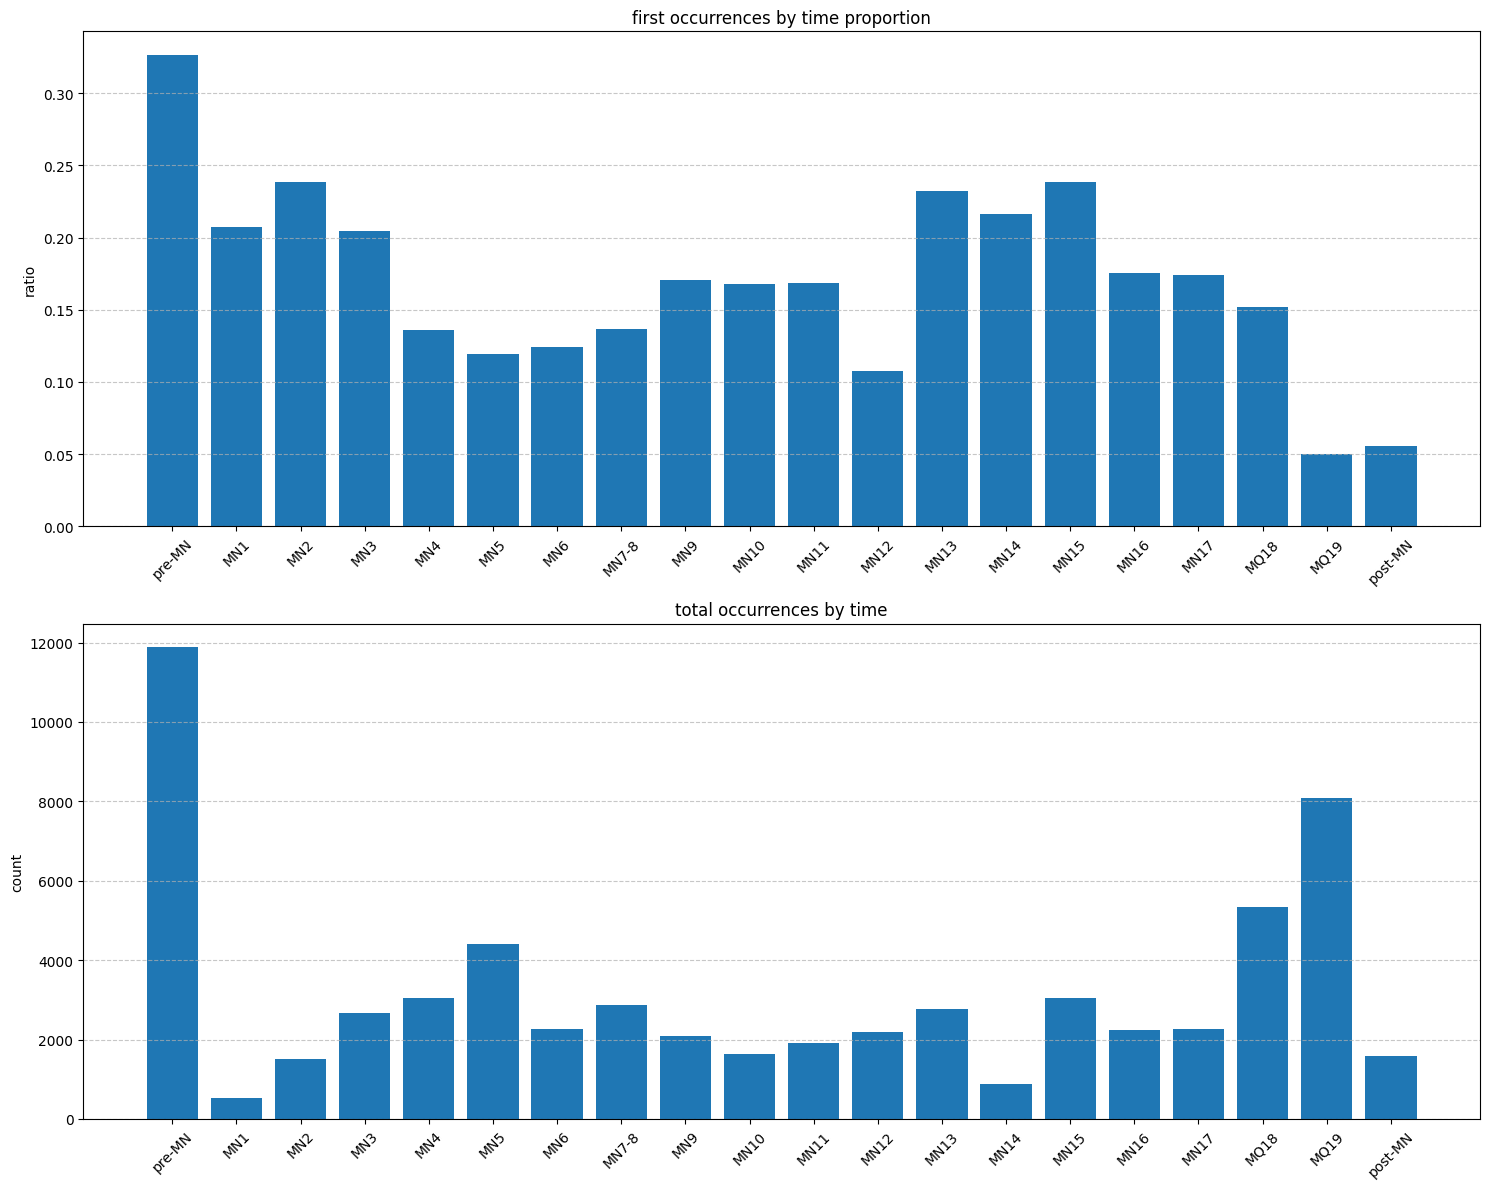

Using natural_earth.countries dataset for world map
natural earth datasets:
datasets registry can't be listed


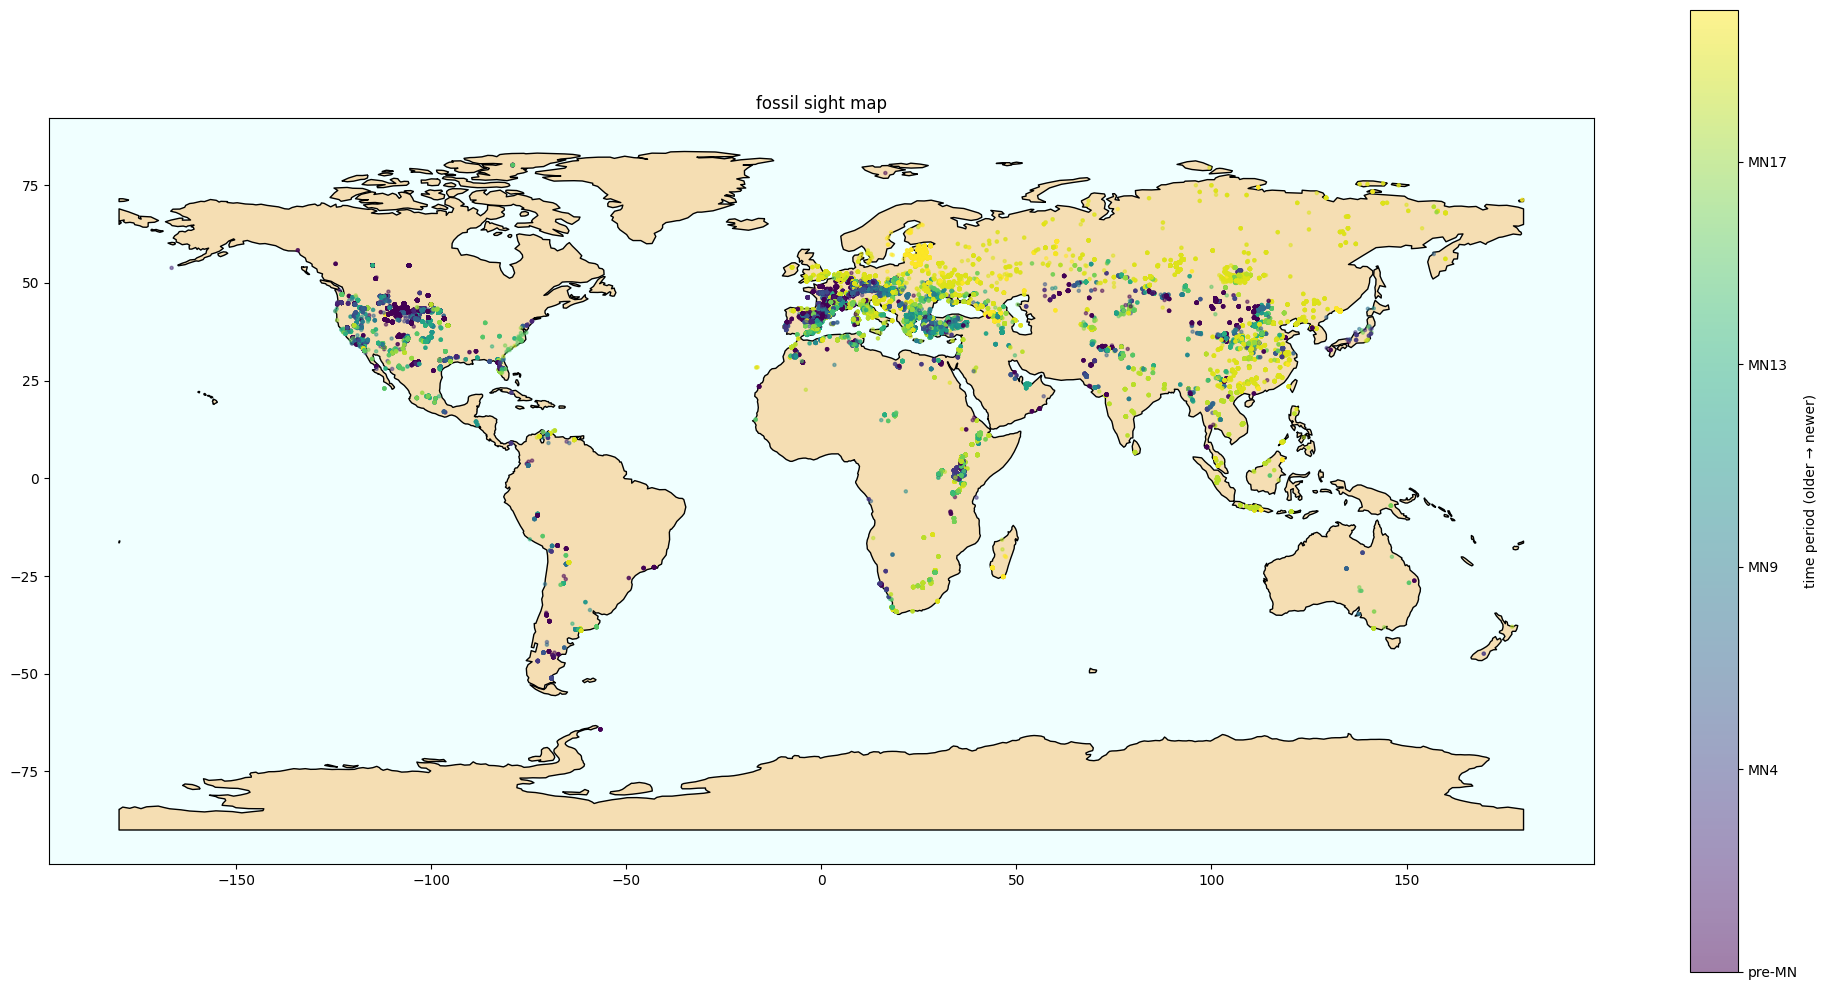

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import geodatasets.data as geodata
import geodatasets

mnseq = ['pre-MN', 'MN1', 'MN2', 'MN3', 'MN4', 'MN5', 'MN6', 'MN7-8', 'MN9', 
            'MN10', 'MN11', 'MN12', 'MN13', 'MN14', 'MN15', 'MN16', 'MN17', 
            'MQ18', 'MQ19', 'post-MN']

specietime = pd.crosstab(index=filtdf['SPECIES_ID'], columns=filtdf['MN_UNIT'])
for unit in mnseq:
    if unit not in specietime.columns:
        specietime[unit] = 0
specietime = specietime[mnseq]

print("species/time sight:")
print(specietime.head())

timerank = {unit: idx for idx, unit in enumerate(mnseq)}
filtdf['MN_RANK'] = filtdf['MN_UNIT'].map(timerank)

firstidx = filtdf.groupby('SPECIES_ID')['MN_RANK'].idxmin()
firsthappen = filtdf.loc[firstidx, ['SPECIES_ID', 'MN_UNIT']]
firsthappen = firsthappen.set_index('SPECIES_ID')

print("\nfirst sight time of species:")
print(firsthappen.head())

firsttime = firsthappen['MN_UNIT'].value_counts().reindex(mnseq, fill_value=0)
totaltime = filtdf['MN_UNIT'].value_counts().reindex(mnseq, fill_value=0)
proportion = firsttime / totaltime

print("\nfirst sight ratio by time:")
for unit in mnseq:
    if totaltime[unit] > 0:
        print(f"{unit}: {proportion[unit]:.4f}")

plt.figure(figsize=(15, 12))
plt.subplot(2, 1, 1)
plt.bar(mnseq, proportion)
plt.xticks(rotation=45)
plt.title('first occurrences by time proportion')
plt.ylabel('ratio')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 1, 2)
plt.bar(mnseq, totaltime)
plt.xticks(rotation=45)
plt.title('total occurrences by time')
plt.ylabel('count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("Using natural_earth.countries dataset for world map")
print("natural earth datasets:")
try:
    import geodatasets.data as geodata
    available = [name for name in geodata.registry.keys() 
                if 'natural' in name.lower() or 'earth' in name.lower()]
    print(available)
except Exception as e:
    print(f"datasets {e} can't be listed")

earthway = geodatasets.get_path('natural_earth.land')
world = gpd.read_file(earthway)

fig, ax = plt.subplots(figsize=(20, 10))
world.plot(ax=ax, color='wheat', edgecolor='black')
ax.set_facecolor('azure')
scatter = ax.scatter(filtdf['LONG'], filtdf['LAT'], 
                    c=filtdf['MN_RANK'],  
                    cmap='viridis',
                    s=5,
                    alpha=0.5)

plt.title('fossil sight map')
cbar = plt.colorbar(scatter, label='time period (older → newer)')
cbar.set_ticks([timerank[unit] for unit in mnseq[::4]])
cbar.set_ticklabels([unit for unit in mnseq[::4]])

plt.tight_layout()
plt.show()

### Exercise 5. a)

Create a DataFrame that collects the following information for every locality: locality number (LIDNUM), longitude, latitude, time unit, number of first occurrences in the locality, number of all occurrences in the locality and proportion of first occurrences in the locality. Note, you should use LIDNUM to identify unique localities and not the NAME variable (why?).

### Answer 5. a)

In [45]:
filtdf['is_first_occurrence'] = False
filtdf.loc[firstidx, 'is_first_occurrence'] = True

gruplocal = filtdf.groupby('LIDNUM').agg({
    'LONG': 'first',
    'LAT': 'first',
    'MN_UNIT': 'first',
    'SPECIES_ID': 'count',
    'is_first_occurrence': 'sum'
}).rename(columns={
    'SPECIES_ID': 'all_occurrences', 
    'is_first_occurrence': 'first_occurrences'
})

gruplocal['proportion'] = gruplocal['first_occurrences'] / gruplocal['all_occurrences']
gruplocal = gruplocal.reset_index()

print("locality:")
print(gruplocal.head())
print(f"\ntotal: {len(gruplocal)}")

locality:
   LIDNUM       LONG        LAT MN_UNIT  all_occurrences  first_occurrences  \
0   10001 -99.133333  19.433330     MN2                1                  1   
1   10002 -96.414167  16.898056     MN3                3                  2   
2   10003 -96.716667  17.050000     MN5                1                  0   
3   10004 -96.716667  17.050000     MN5                8                  5   
4   10005 -96.716667  17.050000     MN6                1                  0   

   proportion  
0    1.000000  
1    0.666667  
2    0.000000  
3    0.625000  
4    0.000000  

total: 7239


We use LIDNUM because it uniquely identifies localities. NAME fields can have duplicates. Furthermore, the name recordings can have inconsistencies, like spelling mistakes or variations. Moreover, the numeric ID's serve as the primary keys compared to written names in databases for clear precision.

### Exercise 5. b)

Visualize the distribution of localities in space and time. For each time unit, plot the LAT and LONG coordinates of each locality (corresponding to the time unit). For example, you can use the above codes to create a geographic map and then use a standard matplotlib scatter plot to add the localities. Choose the marker size for each locality such that it is relative to the number of occurrences in the locality (bigger markers for bigger localities).

### Answer 5. b)

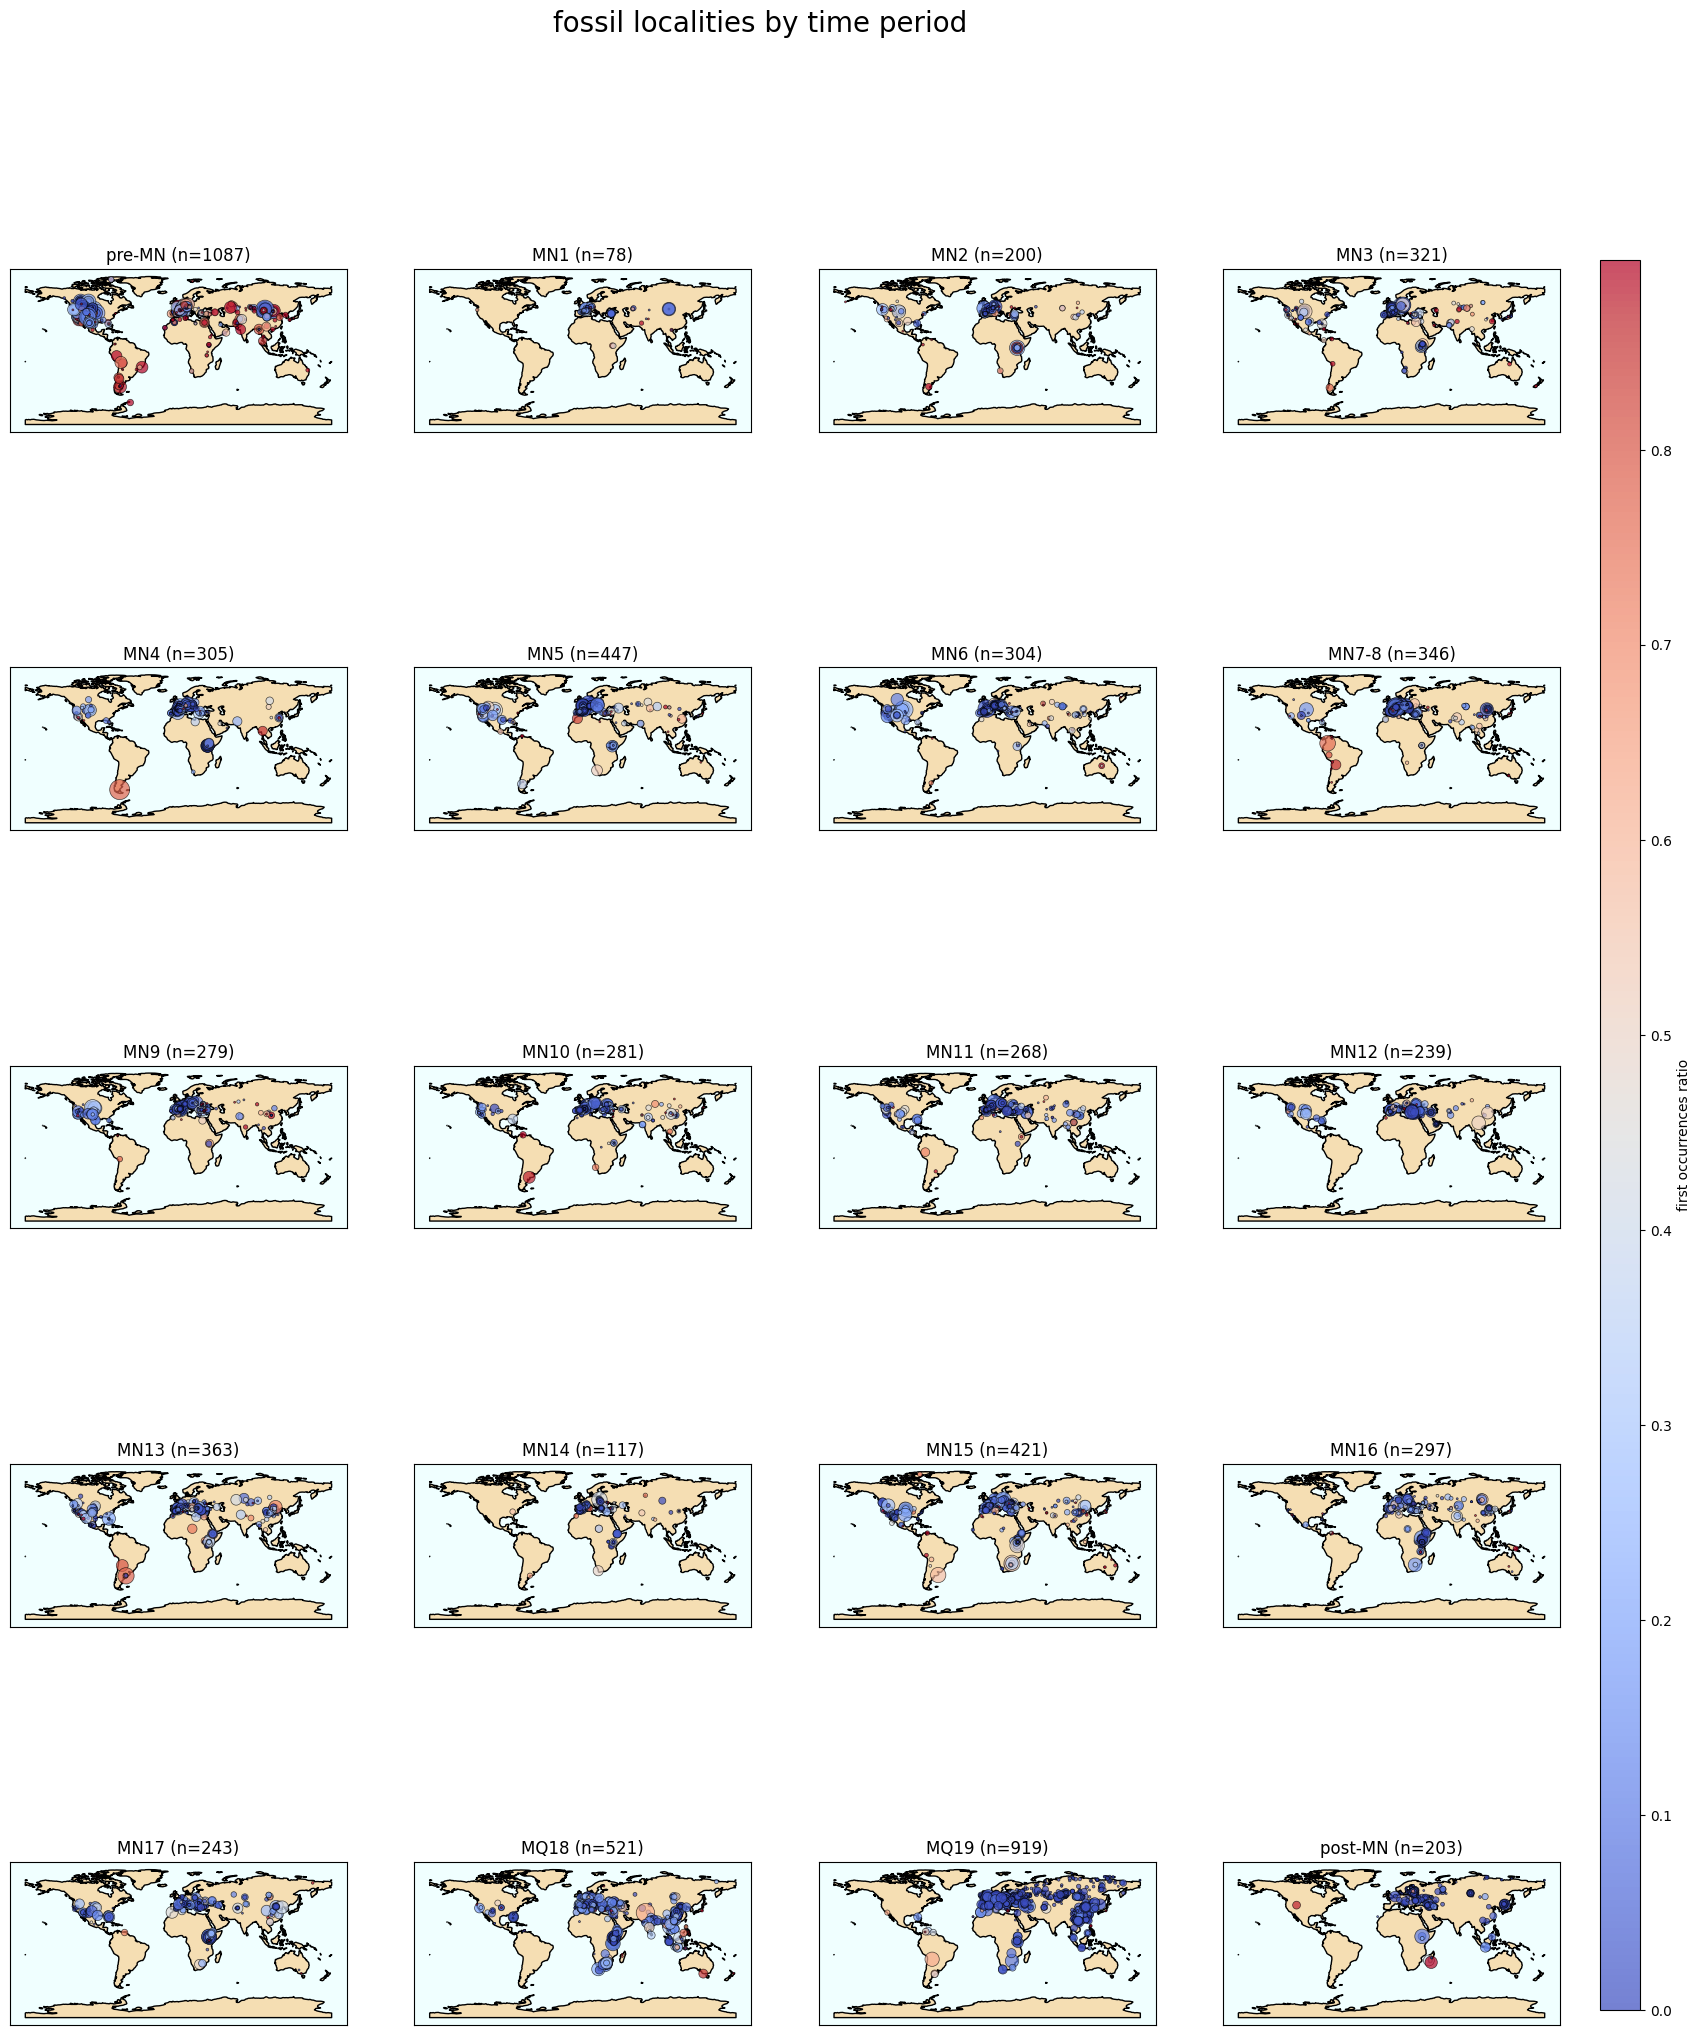

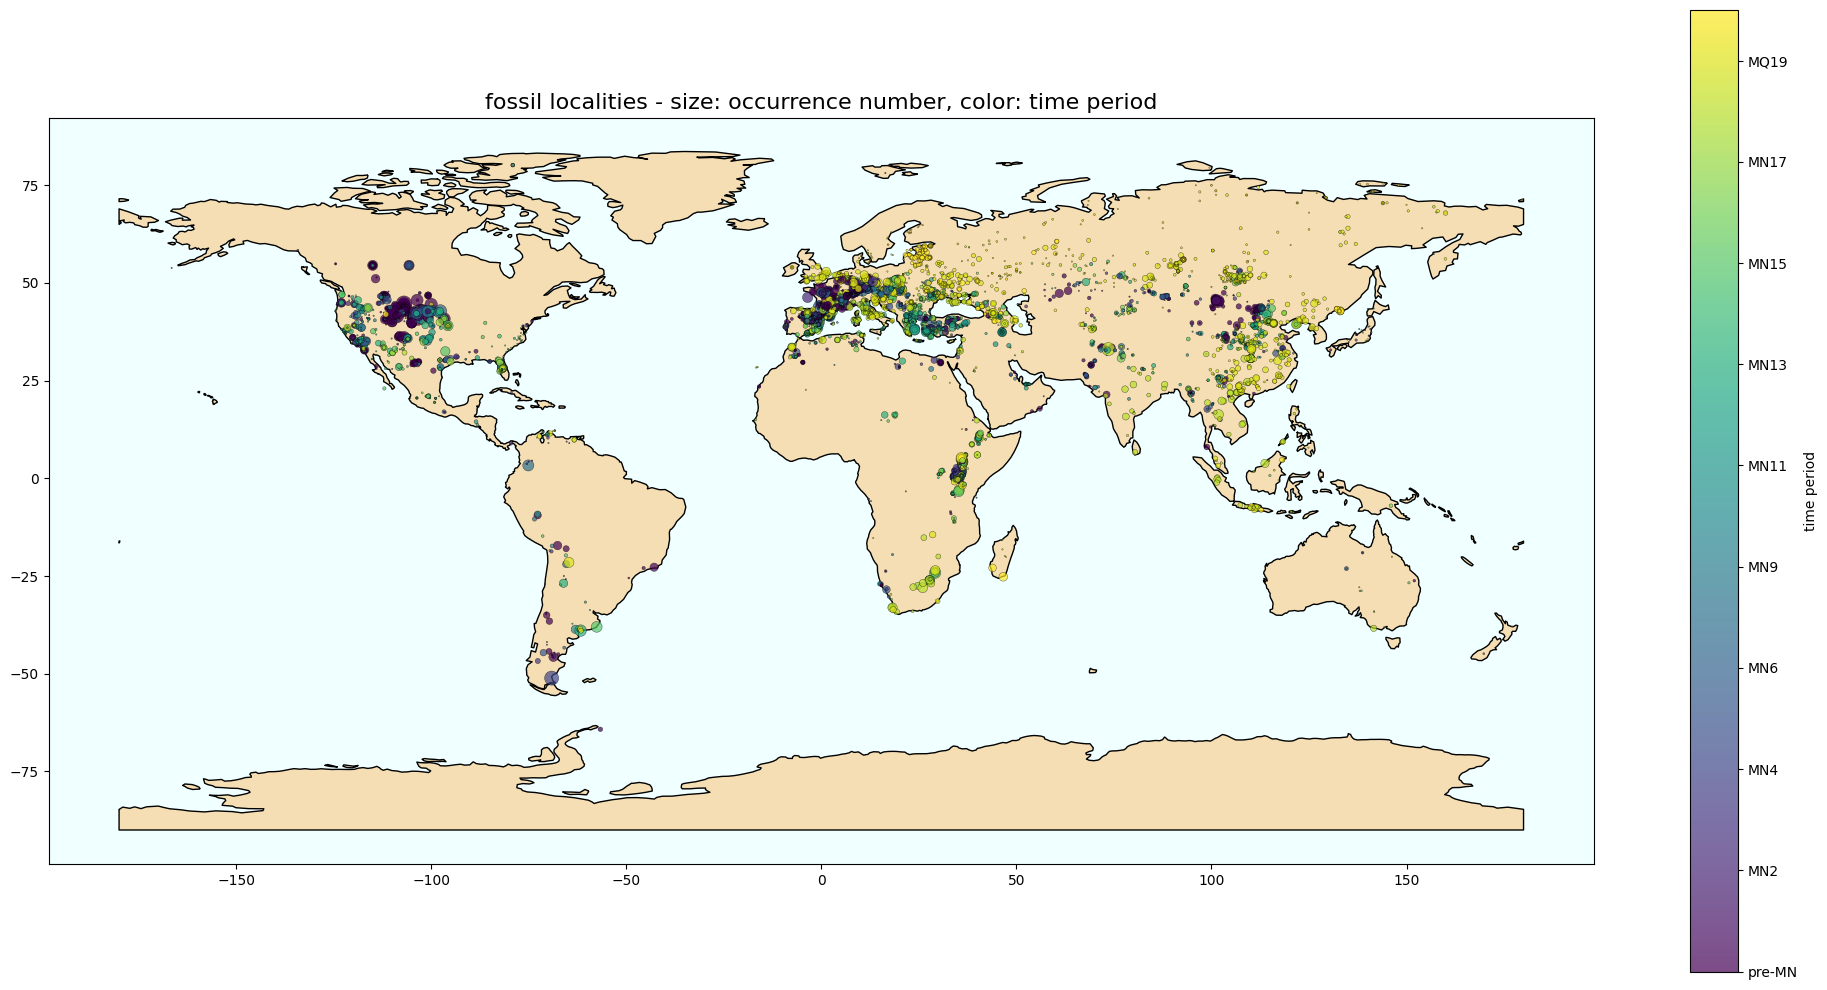

In [46]:
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.flatten()

for i, unit in enumerate(mnseq):
    if i < len(axes):
        localunit = gruplocal[gruplocal['MN_UNIT'] == unit]

        ax = axes[i]
        world.plot(ax=ax, color='wheat', edgecolor='black')
        ax.set_facecolor('azure')

        scatter = ax.scatter(
            localunit['LONG'], 
            localunit['LAT'],
            s=localunit['all_occurrences'] * 2,
            c=localunit['proportion'],
            cmap='coolwarm',
            alpha=0.7,
            edgecolor='black',
            linewidth=0.5
        )

        ax.set_title(f'{unit} (n={len(localunit)})')
        ax.set_xticks([])
        ax.set_yticks([])

cbarax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(scatter, cax=cbarax)
cbar.set_label('first occurrences ratio')
fig.suptitle('fossil localities by time period', fontsize=20, y=0.95)

fig, ax = plt.subplots(figsize=(20, 10))
world.plot(ax=ax, color='wheat', edgecolor='black')
ax.set_facecolor('azure')

numtime = {unit: i for i, unit in enumerate(mnseq)}
gruplocal['time_num'] = gruplocal['MN_UNIT'].map(numtime)

scatter = ax.scatter(
    gruplocal['LONG'], 
    gruplocal['LAT'],
    s=gruplocal['all_occurrences'],
    c=gruplocal['time_num'],
    cmap='viridis',
    alpha=0.7,
    edgecolor='black',
    linewidth=0.3
)

plt.title('fossil localities - size: occurrence number, color: time period', fontsize=16)
cbar = plt.colorbar(scatter)
cbar.set_label('time period')
cbar.set_ticks([numtime[unit] for unit in mnseq[::2]])
cbar.set_ticklabels([unit for unit in mnseq[::2]])

plt.tight_layout()
plt.show()

### Exercise 5. c)

Based on exercises 4 and 5, what kind of observations about sampling
can you make? Are there differences in sampling density over space and
time? Compare some basic sampling properties between Africa, Asia and
Europe, e.g. spatial coverage and average number of occurrences per
locality.

### Answer 5. c)

continental statistics:
          LIDNUM all_occurrences            first_occurrences            \
           count             sum       mean               sum      mean   
continent                                                                 
Africa       734            7072   9.634877              1331  1.813351   
Asia        1503           11489   7.644045              2484  1.652695   
Europe      3728           30695   8.233637              3400  0.912017   
Other       1274           13960  10.957614              4133  3.244113   

          proportion  
                mean  
continent             
Africa      0.180866  
Asia        0.213466  
Europe      0.115778  
Other       0.276183  

time unit distribution to continent:
continent  Africa  Asia  Europe  Other
MN_UNIT                               
MN1             2    12      62      2
MN10           14    36     203     28
MN11            9    68     155     36
MN12           30    34     148     27
MN13           41

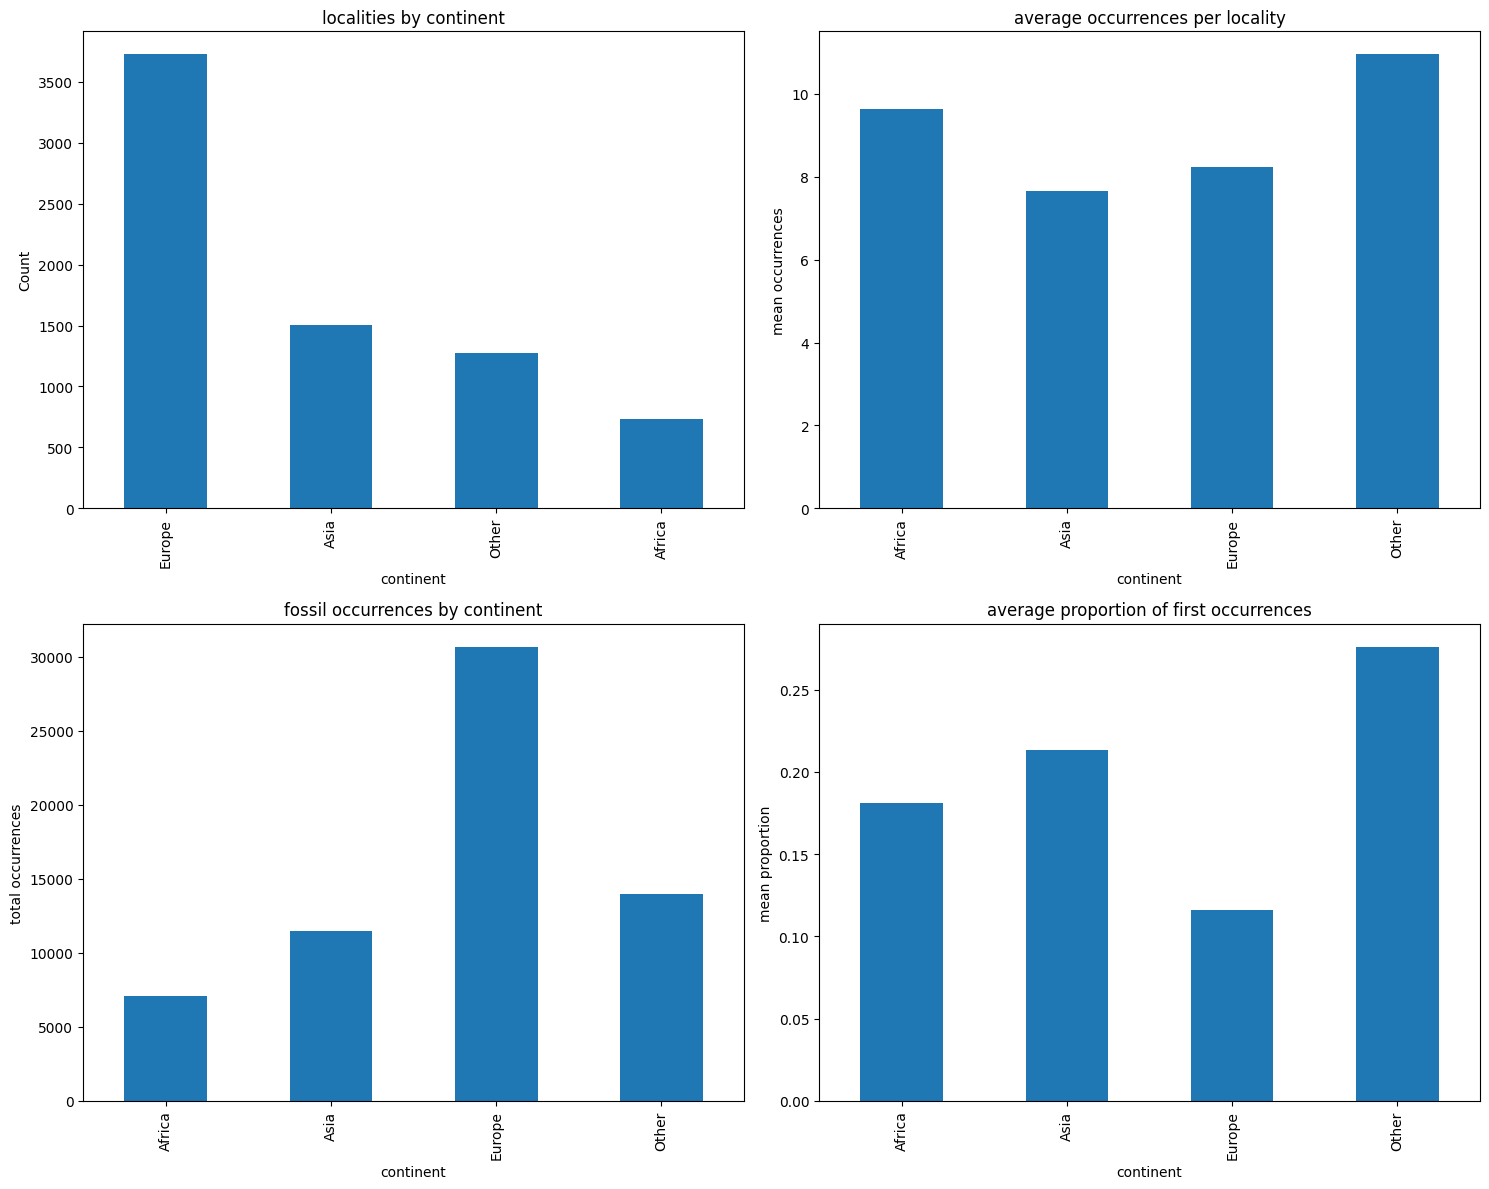

In [47]:
def get_continent(row):
    lon, lat = row['LONG'], row['LAT']
    if -20 <= lon <= 55 and -35 <= lat <= 35:
        return 'Africa'
    elif lon >= 40 and 0 <= lat <= 70:
        return 'Asia'
    elif -10 <= lon <= 40 and 35 <= lat <= 70:
        return 'Europe'
    else:
        return 'Other'

gruplocal['continent'] = gruplocal.apply(get_continent, axis=1)
contstat = gruplocal.groupby('continent').agg({
    'LIDNUM': 'count',
    'all_occurrences': ['sum', 'mean'],
    'first_occurrences': ['sum', 'mean'],
    'proportion': 'mean'
})

print("continental statistics:")
print(contstat)

timetocont = pd.crosstab(gruplocal['MN_UNIT'], gruplocal['continent'])
print("\ntime unit distribution to continent:")
print(timetocont)

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
localpercont = gruplocal['continent'].value_counts()
localpercont.plot(kind='bar')
plt.title('localities by continent')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
avgsight = gruplocal.groupby('continent')['all_occurrences'].mean()
avgsight.plot(kind='bar')
plt.title('average occurrences per locality')
plt.ylabel('mean occurrences')

plt.subplot(2, 2, 3)
totsight = gruplocal.groupby('continent')['all_occurrences'].sum()
totsight.plot(kind='bar')
plt.title('fossil occurrences by continent')
plt.ylabel('total occurrences')

plt.subplot(2, 2, 4)
avgratio = gruplocal.groupby('continent')['proportion'].mean()
avgratio.plot(kind='bar')
plt.title('average proportion of first occurrences')
plt.ylabel('mean proportion')

plt.tight_layout()
plt.show()

Fossil Sampling Pattern Observations:

In spatial distribution, Europe has the densest fossil sampling, then Asia and Africa follows. The rich European fossil record has localities with multiple specie occurences. Africa and Asia has more scattered distributions. North America has an important amount of fossil sightings in the "Other" section, and they are concentrated in certain regions.

We can interpret the temporal patterns as biases towards the younger time units. Since the fossils can be preserved better in closer times, MQ18 and MQ19 fossils are more globally. European fossil sightings are focused on periods between MN6 through MN13 as well. Additionally, African localities are concentrated in pre-MN and recent times.

The difference between contintents show that Europe can have better sampling effort and better fosil preservation since it has the highest number of localities and mean number of occurence per locality. Asian fossil sites  are scattered location wise, and is higher in Central and East Asia. Although Africa has fever localities, from the occurence to locality ratio, we can comment that the occurences are concentrated in fossil-rich places. Coming to the "Other" category, which is mostly South and North America, the distribution is more random, but there are samplings focused on certain time periods.

In first occurences, Africa has higher ratios, especially in older time periods. Europe has more moderste first occurences and Asia has them in MN4-MN6 periods.

## 1.4 Localities and sampling

One possible way to reduce noise in the fossil data is to spatially aggregate occurrences. By this we mean the following: instead of considering only the occurrences of a given locality, we consider all occurrences found in some geographic area around the focal locality (encompassing other fossil localities) to be representative of the fauna that lived in the area. After all, given the typical length of MN time units (around 1 million years) and the mobility of large mammals, it is reasonable to assume that occurrences in nearby localities should also be reflected in our estimation of the faunal composition of the focal locality.

The number of first occurrences observed in a given time and place is dependant on how well that area was sampled in previous time units. For example, we would expect to find more first occurrences in an area that was poorly sampled in the preceding time unit, because it is more likely that we simply do not have observations of some species in the previous time unit that nevertheless existed then.

A general challenge with fossil data is that it suffers from a sampling bias, i.e. sampling is uneven in space and time. Then, it is not very informative to simply look when and where you find most first occurrences, because the number of first occurrences is correlated with the total number of occurrences in a given time and area (which reflects sampling bias).

Next, we will measure sampling density for each locality as the number of occurrences observed in a given area around that locality in the preceding time unit. We will also collect occurrence statistics for that same area in the time unit of the locality. These statistics will later be used to estimate statistical significance of the observed number of first occurrences.

### Exercise 6.

For each locality, look at a ten by ten degrees area (in latitude and longitude) centered around the locality. Record the total number of occurrences and total number of first occurrences found within that square in the time unit corresponding to the focal locality. Also, record the total number of occurrences within that square in the preceding time unit (relative to the focal locality). Record these numbers into the DataFrame that was created in exercise 5 (add new columns).

### Answer 6.

In [48]:
timetoidx = {unit: i for i, unit in enumerate(mnseq)}
gruplocal['box_occurrences'] = 0
gruplocal['box_first_occurrences'] = 0
gruplocal['prev_box_occurrences'] = 0

for idx, locality in gruplocal.iterrows():
    lon, lat = locality['LONG'], locality['LAT']
    phaseunit = locality['MN_UNIT']
    phaseidx = timetoidx[phaseunit]
    boxin = (
        (filtdf['LONG'] >= lon - 5) & (filtdf['LONG'] <= lon + 5) &
        (filtdf['LAT'] >= lat - 5) & (filtdf['LAT'] <= lat + 5)
    )

    unitsame = filtdf['MN_UNIT'] == phaseunit
    boxsame = filtdf[boxin & unitsame]
    gruplocal.loc[idx, 'box_occurrences'] = len(boxsame)
    gruplocal.loc[idx, 'box_first_occurrences'] = boxsame['is_first_occurrence'].sum()

    if phaseidx > 0:
        before = mnseq[phaseidx - 1]
        befcond = filtdf['MN_UNIT'] == before
        beforebox = filtdf[boxin & befcond]
        gruplocal.loc[idx, 'prev_box_occurrences'] = len(beforebox)

print("sample localities:")
colsamp = ['LIDNUM', 'MN_UNIT', 'all_occurrences', 'first_occurrences', 
               'box_occurrences', 'box_first_occurrences', 'prev_box_occurrences']
print(gruplocal[colsamp].head())

sample localities:
   LIDNUM MN_UNIT  all_occurrences  first_occurrences  box_occurrences  \
0   10001     MN2                1                  1                1   
1   10002     MN3                3                  2                7   
2   10003     MN5                1                  0                9   
3   10004     MN5                8                  5                9   
4   10005     MN6                1                  0                1   

   box_first_occurrences  prev_box_occurrences  
0                      1                     0  
1                      4                     1  
2                      5                     0  
3                      5                     0  
4                      0                     9  


## 1.5 Logistic regression

In order to determine if an observed number of first occurrences in a given area at a given time is significantly high, we should first establish a reasonable expectation for that number. Then, we can compare our observations to the expectation to find out when and where there are significantly many first occurrences observed. So, we want to look at how the number of observations (occurrences) in a given focal area in the preceding time unit affects the proportion of first occurrences found in the focal locality now. To this end, we will perform a simple regression analysis. In particular, given that the data here is in the form of “first occurrence” or “not a first occurrence”, we will use logistic regression. In this manner, we will be able to establish what is a reasonable expectation for the proportion of first occurrences observed now given past sampling density.

For the logistic regression, we use the statsmodel library (https://www.statsmodels.org/stable/index.html). The following is an example code for how to use statsmodels:

```python
import statsmodels.api as sm

# X gives the data for the independent variable
X = regression[:, 0]

# add a constant term to the regression (see below)
X = sm.add_constant(X)

# y gives the data for the dependent variable
y = regression[:, 1]

# logistic regression
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

# get the estimated parameters for the logistic regression
coefficients = result.params

# get the estimated parameters for the 95% confidence interval
# of the logistic regression
conf95 = result.conf_int(alpha=0.05)
```

In the above code, we fit a logistic regression curve of the form
$
y(x) = \frac{1}{1 + e^{-(c_0 + c_1 x)}}
$
, (1)
where x is the independent variable (past sampling density), y the dependent variable (expected proportion of first occurrences now) and c0 and c1 are the parameters solved by logistic regression (sm.add constant() adds the c0 term to the regression).

From here on we will be focusing on an area roughly covering Europe, which is relatively well sampled over time.

### Exercise 7. a)

Create the regression data set. Only use localities within
the co-ordinates -25<LONG<40 and LAT>35 and time unit within MN2-
MQ19 (why not include MN1?). Create an m × 2 array, where m is the
total number of occurrences in all the localities. Each row in the array
represents one occurrence. For each occurrence, fill in to the first column
of the array the number of occurrences in the focal area in the previous
time unit (calculated in exercise 6). For the second column, fill in 1 for a
first occurrence and 0 for other occurrences.

### Answer 7. a)

In [49]:
filteuro = ((gruplocal['LONG'] > -25) & (gruplocal['LONG'] < 40) & 
                (gruplocal['LAT'] > 35) & 
                (gruplocal['MN_UNIT'].isin(mnseq[2:19])))

eurloc = gruplocal.loc[filteuro, 'LIDNUM'].values
eurocc = filtdf[filtdf['LIDNUM'].isin(eurloc)]
m = len(eurocc)
regression = np.zeros((m, 2))

for i, (_, occurrence) in enumerate(eurocc.iterrows()):
    localdat = gruplocal[gruplocal['LIDNUM'] == occurrence['LIDNUM']].iloc[0]
    regression[i, 0] = localdat['prev_box_occurrences']
    regression[i, 1] = 1 if occurrence['is_first_occurrence'] else 0

print(f"regression shape: {regression.shape}")
print("first rows:")
print(regression[:5])
firstratio = np.mean(regression[:, 1]) * 100
print(f"first occurrences percentage: {firstratio:.2f}%")

regression shape: (26771, 2)
first rows:
[[967.   1.]
 [273.   0.]
 [273.   0.]
 [273.   0.]
 [273.   0.]]
first occurrences percentage: 8.94%


### Exercise 7. b) 

Perform logistic regression.

### Answer 7. b)

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                26771
Model:                          Logit   Df Residuals:                    26769
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Apr 2025   Pseudo R-squ.:                 0.01900
Time:                        19:16:30   Log-Likelihood:                -7908.1
converged:                       True   LL-Null:                       -8061.3
Covariance Type:            nonrobust   LLR p-value:                 1.367e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8911      0.032    -59.727      0.000      -1.953      -1.829
x1            -0.0013   7.93e-05    -15.916      0.000      -0.001      -0.001

model coefficients:
intercept (c₀): -1.8911
slope (

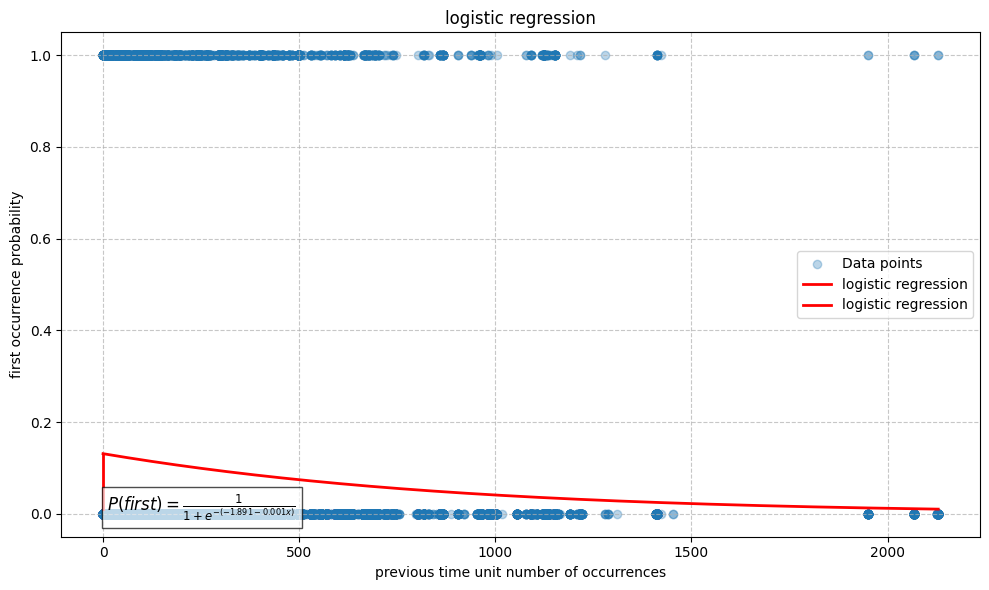

In [50]:
import statsmodels.api as sm

x = regression[:, 0]
x = sm.add_constant(x)
y = regression[:, 1]
model = sm.Logit(y, x)
result = model.fit(disp=0)
print(result.summary())

coefficients = result.params
print("\nmodel coefficients:")
print(f"intercept (c₀): {coefficients[0]:.4f}")
print(f"slope (c₁): {coefficients[1]:.4f}")
conf95 = result.conf_int(alpha=0.05)
print(f"\n95% confidence intervals:")
print(f"intercept: ({conf95[0][0]:.4f}, {conf95[0][1]:.4f})")
print(f"slope: ({conf95[1][0]:.4f}, {conf95[1][1]:.4f})")

plt.figure(figsize=(10, 6))
plt.scatter(regression[:, 0], regression[:, 1], alpha=0.3, label="Data points")

rangex = np.linspace(0, max(regression[:, 0]), 1000)
rangex = sm.add_constant(rangex)
predy = result.predict(rangex)

plt.plot(rangex, predy, 'r-', linewidth=2, label="logistic regression")
plt.xlabel('previous time unit number of occurrences')
plt.ylabel('first occurrence probability')
plt.title('logistic regression')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
formula = r"$P(first) = \frac{1}{1 + e^{-(" + f"{coefficients[0]:.3f} {coefficients[1]:+.3f}x" + r")}}$"
plt.text(0.05, 0.05, formula, transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

### Exercise 7. c)

Plot regression curve and 95%-confidence intervals.

### Answer 7.c)

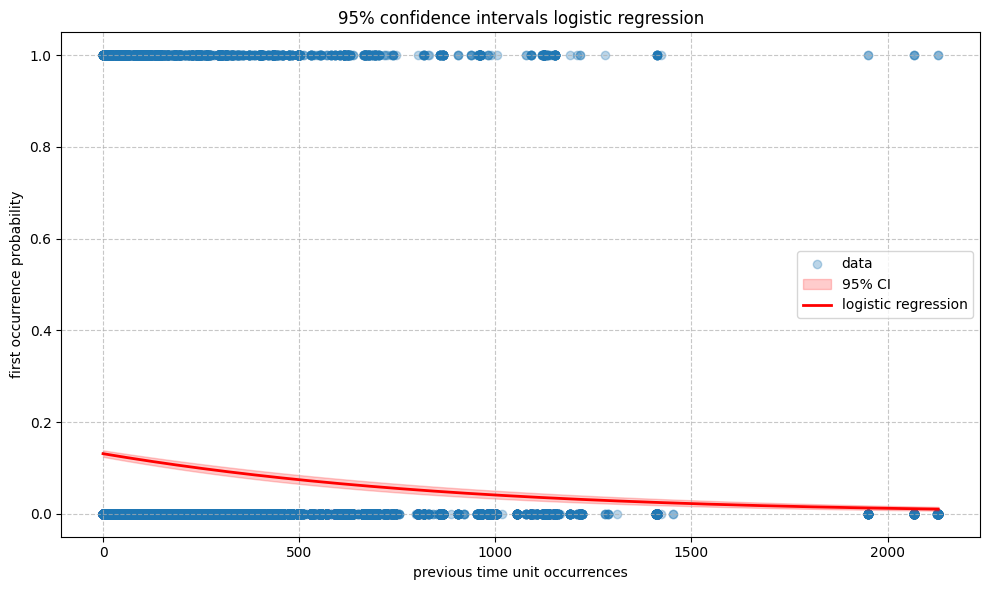

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(regression[:, 0], regression[:, 1], alpha=0.3, label="data")
valx = np.linspace(0, max(regression[:, 0]), 1000)
xdisp = sm.add_constant(valx.reshape(-1, 1))
predicted = result.predict(xdisp)

lowbond = 1 / (1 + np.exp(-(conf95[0][0] + conf95[1][0] * valx)))
upbond = 1 / (1 + np.exp(-(conf95[0][1] + conf95[1][1] * valx)))
plt.fill_between(valx, lowbond, upbond, alpha=0.2, color='r', label='95% CI')

plt.plot(valx, predicted, 'r-', linewidth=2, label="logistic regression")
plt.xlabel('previous time unit occurrences')
plt.ylabel('first occurrence probability')
plt.title(f'95% confidence intervals logistic regression')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

## 1.6 Statistical significance

Now that we have performed the logistic regression, we have a way to systematically evaluate how many first occurrences to expect, given sampling density in the previous time unit.

### Exercise 8.

For each European locality, calculate the expected proportion of first occurrences in the focal area surrounding the locality using the logistic regression calculated in exercise 7.

### Answer 8.

european localities: 3128

sample localities with predictions:
      LIDNUM MN_UNIT  proportion  expected_proportion  proportion_diff
1030   20001   MN7-8    0.018519             0.065070        -0.046552
1031   20002     MN6    0.037500             0.010966         0.026534
1032   20003     MN6    0.153846             0.126029         0.027817
1033   20004   MN7-8    0.033708             0.074655        -0.040947
1034   20005     MN5    0.064516             0.078037        -0.013521

observed, expected proportion differences:
count    3128.000000
mean        0.001607
std         0.209156
min        -0.131121
25%        -0.108329
50%        -0.071324
75%        -0.005426
max         0.975580
Name: proportion_diff, dtype: float64


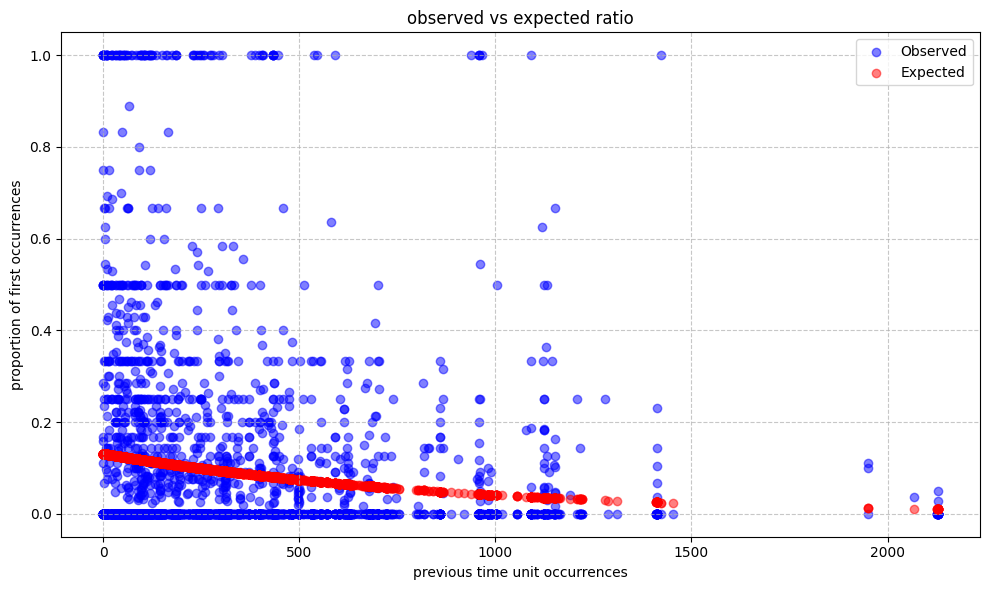

In [52]:
eurolocal = gruplocal[(gruplocal['LONG'] > -25) & (gruplocal['LONG'] < 40) & 
                           (gruplocal['LAT'] > 35) & (gruplocal['MN_UNIT'].isin(mnseq[2:19]))].copy()
eurolocal['expected_proportion'] = 1 / (1 + np.exp(-(coefficients[0] + coefficients[1] * eurolocal['prev_box_occurrences'])))
eurolocal['proportion_diff'] = eurolocal['proportion'] - eurolocal['expected_proportion']

print(f"european localities: {len(eurolocal)}")
print("\nsample localities with predictions:")
print(eurolocal[['LIDNUM', 'MN_UNIT', 'proportion', 'expected_proportion', 'proportion_diff']].head())
print("\nobserved, expected proportion differences:")
print(eurolocal['proportion_diff'].describe())

plt.figure(figsize=(10, 6))
plt.scatter(eurolocal['prev_box_occurrences'], eurolocal['proportion'], 
            alpha=0.5, label='Observed', color='blue')
plt.scatter(eurolocal['prev_box_occurrences'], eurolocal['expected_proportion'], 
            alpha=0.5, label='Expected', color='red')
plt.xlabel('previous time unit occurrences')
plt.ylabel('proportion of first occurrences')
plt.title('observed vs expected ratio')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Now we know for each locality how many first occurrences there are in the area around the locality and we have an estimation of how many first occurrences to expect to find there. Then, we can perform a standard statistical test to evaluate whether the observed number of first occurrences is significantly higher than what we would expect (based on the regression).

### Exercise 9.

For each European locality, calculate the probability of observing as many or more first occurrences in the focal area than what is actually found. Assume that occurrences are binomially distributed to “first occurrences” and “not first occurrences”, so that the probability of a given occurrence to be a first occurrence is equal to the expected proportion of first occurrences in the focal area. You may use, for example, the scipy.stats.binom library (https://docs.scipy.org/doc/scipy-0.14.0/ reference/generated/scipy.stats.binom.html) for the calculations.


high first occurrence localities: 171

10 most significant localities:
      LIDNUM MN_UNIT  all_occurrences  first_occurrences  expected_proportion  \
1047   20019     MN6               33                 18             0.042980   
7009   29490     MN3               48                 26             0.116612   
1129   20113    MN14               62                 29             0.125474   
1437   20470    MN16               35                 19             0.100055   
2065   21298     MN2               24                 14             0.101773   
1997   21209   MN7-8               24                 15             0.130260   
1181   20175    MN13               38                 12             0.048077   
3232   22864    MN13               16                 11             0.127989   
1637   20749    MN14                9                  8             0.122051   
1566   20673    MN15               33                 15             0.113146   

           p_value  
1047  1.110223e

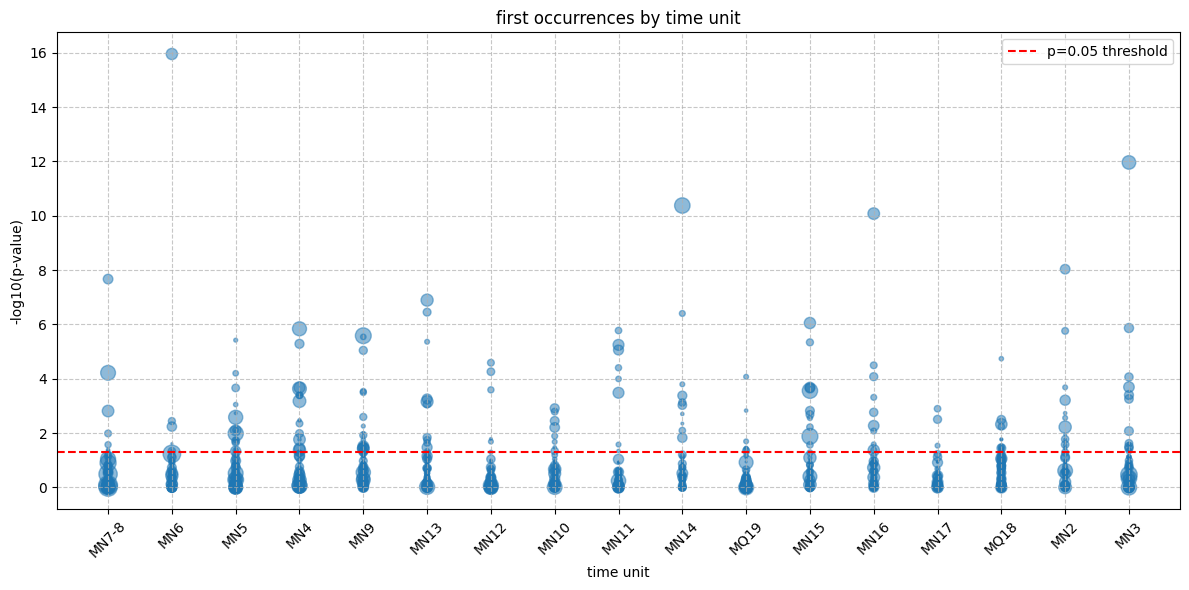

In [54]:
from scipy import stats

eurolocal = gruplocal[(gruplocal['LONG'] > -25) & (gruplocal['LONG'] < 40) & 
                      (gruplocal['LAT'] > 35) & 
                      (gruplocal['MN_UNIT'].isin(mnseq[2:19]))].copy()
eurolocal['expected_proportion'] = 1 / (1 + np.exp(-(coefficients[0] + coefficients[1] * eurolocal['prev_box_occurrences'])))
eurolocal['p_value'] = [1 - stats.binom.cdf(k-1, n, p) if n > 0 else np.nan 
                       for k, n, p in zip(eurolocal['first_occurrences'], 
                                         eurolocal['all_occurrences'],
                                         eurolocal['expected_proportion'])]

significant = eurolocal[eurolocal['p_value'] < 0.05].sort_values('p_value')
print(f"\nhigh first occurrence localities: {len(significant)}")
print("\n10 most significant localities:")
print(significant[['LIDNUM', 'MN_UNIT', 'all_occurrences', 'first_occurrences', 
                  'expected_proportion', 'p_value']].head(10))

plt.figure(figsize=(12, 6))
plt.scatter(eurolocal['MN_UNIT'], -np.log10(eurolocal['p_value']), 
           alpha=0.5, s=eurolocal['all_occurrences']*2)
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--', label='p=0.05 threshold')
plt.xticks(rotation=45)
plt.xlabel('time unit')
plt.ylabel('-log10(p-value)')
plt.title('first occurrences by time unit')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The above calculations give us a method to evaluate systematically, when and where the data shows an unexpectedly high amount of first occurrences, while taking into account variable sampling in space and time. Localities that show the probability of the observations to be 0.05 or less are typically thought of as statistically significant. We can look for interesting speciation patterns in space and time by plotting the localities with their significance indicated.

### Exercise 10.

For each time unit, plot localities on a map covering the coordinates defined in exercise 7a and indicate their significance level with a sliding color scheme. Highlight localities that have p-value less than 0.05 (i.e. probability of observations is less than 0.05). Describe briefly the overall patterns that you observe.

### Answer 10.

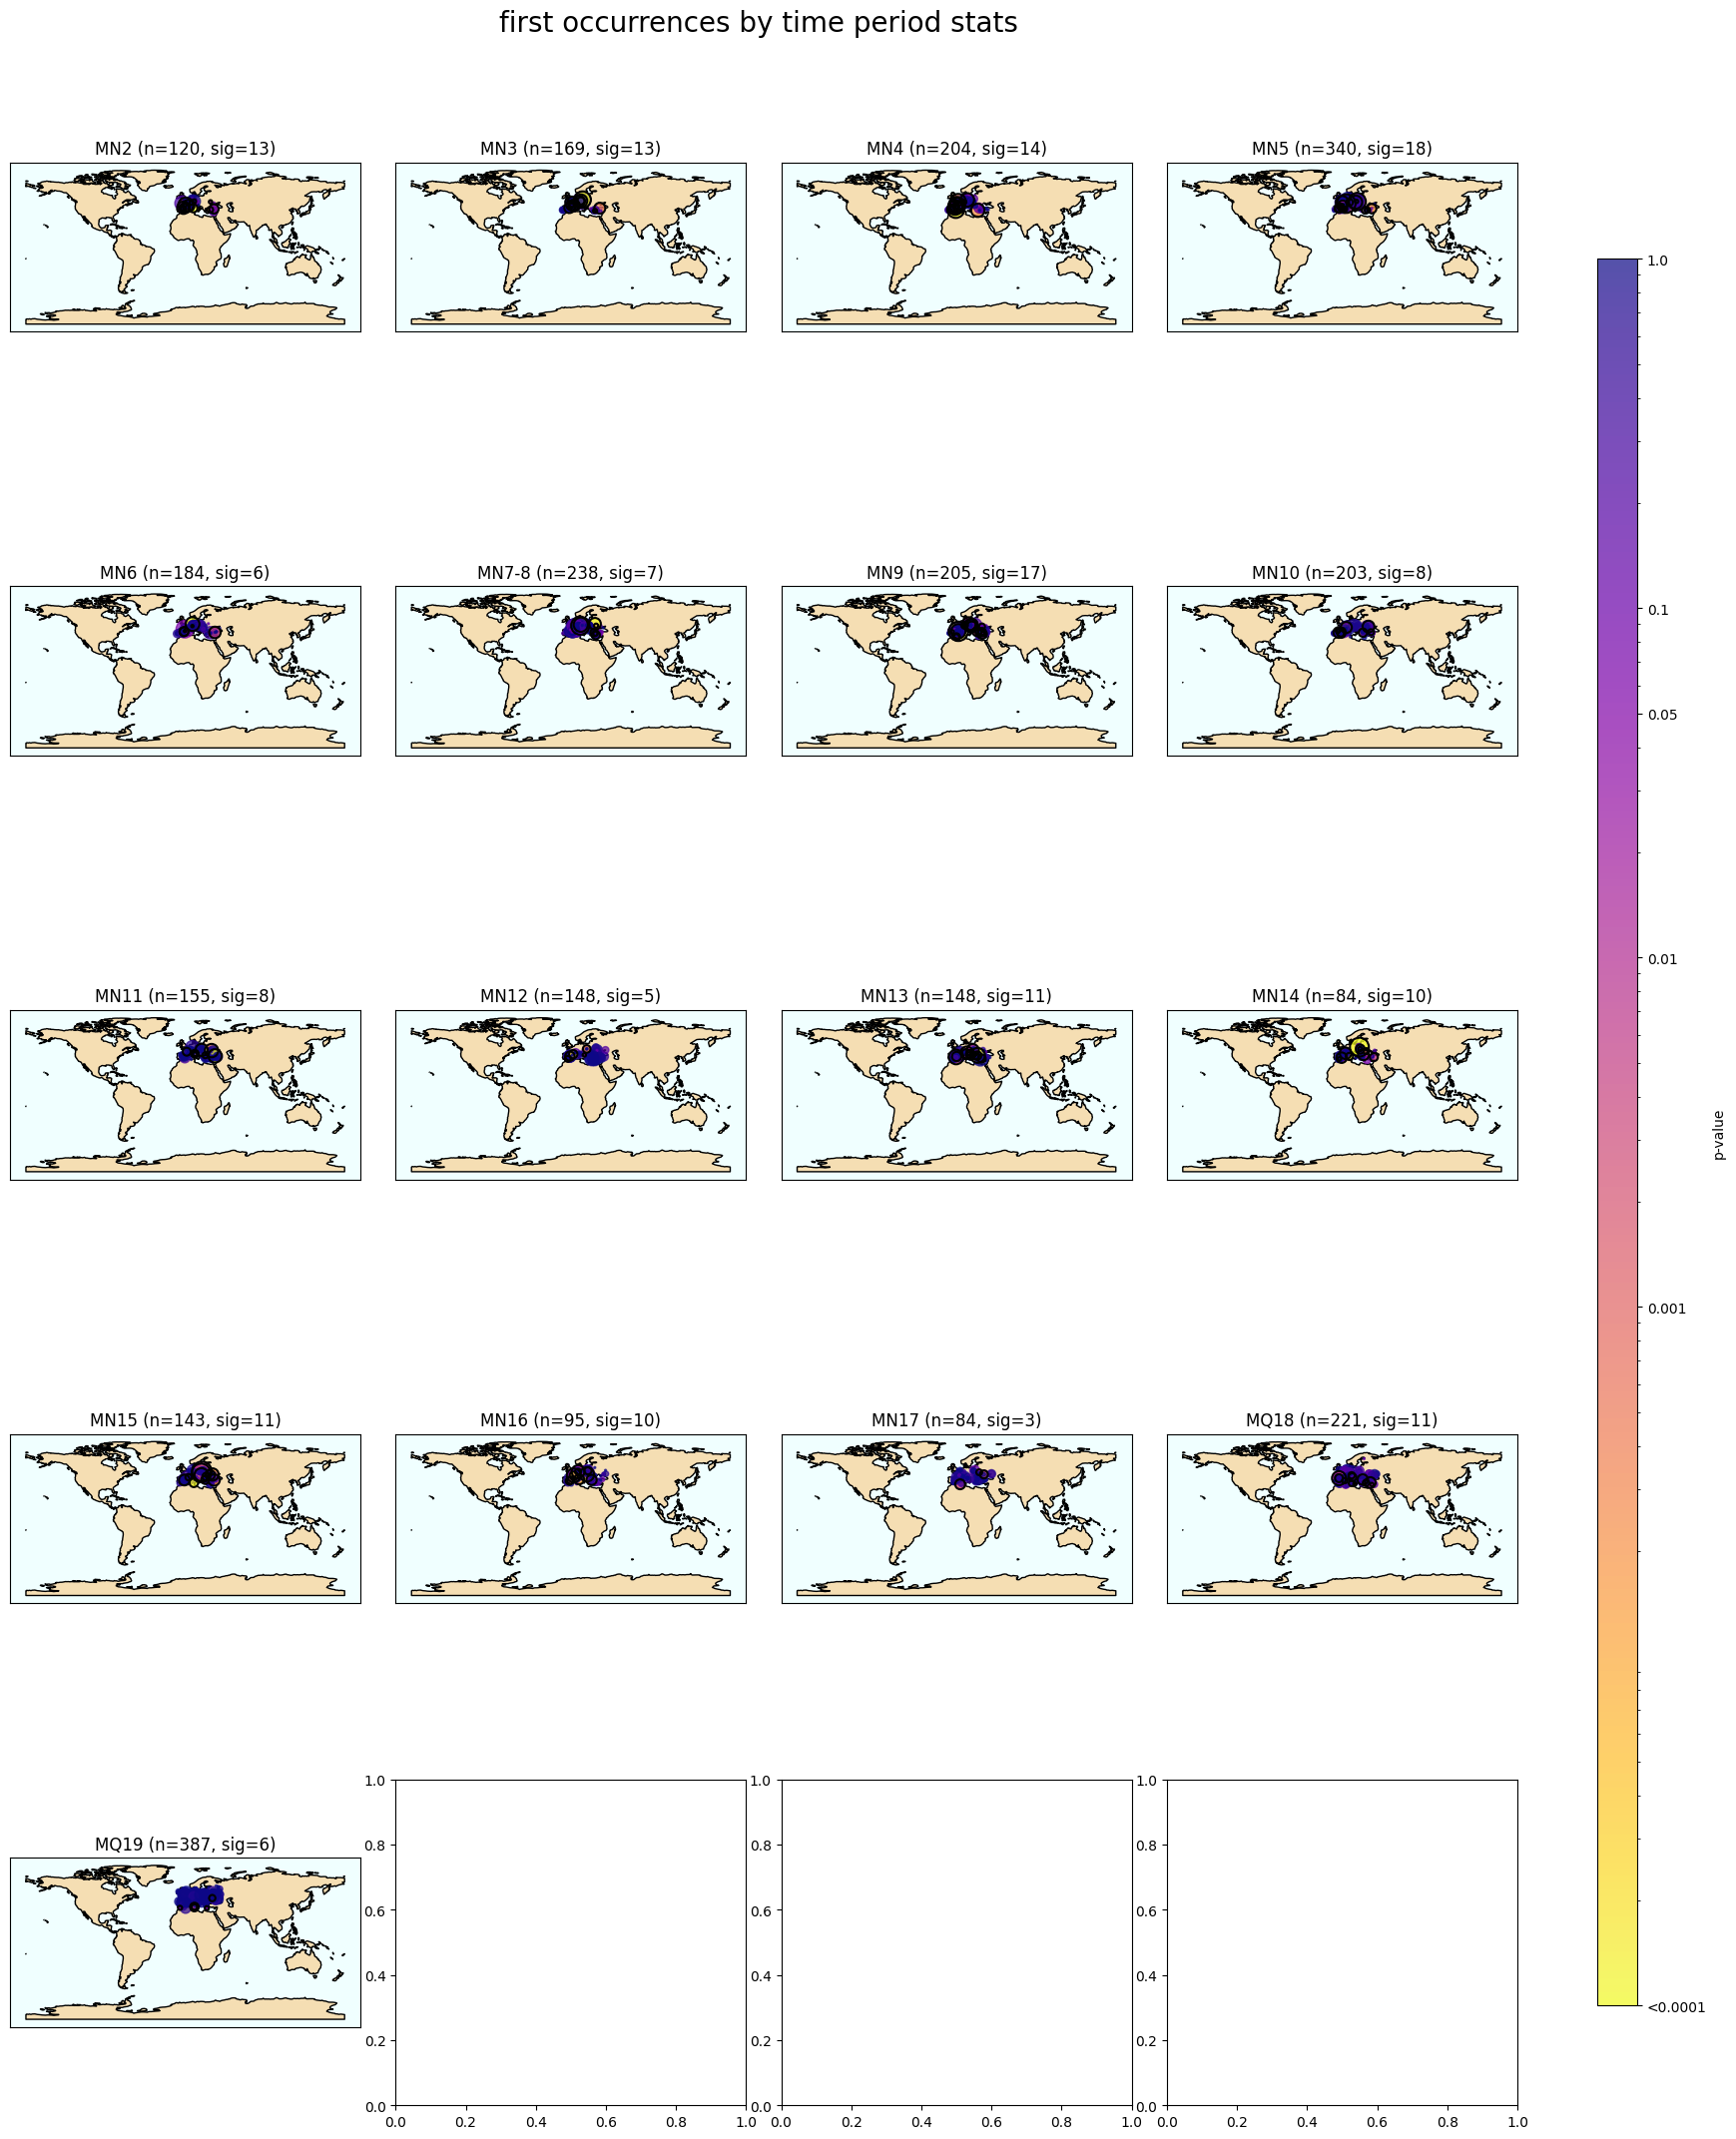

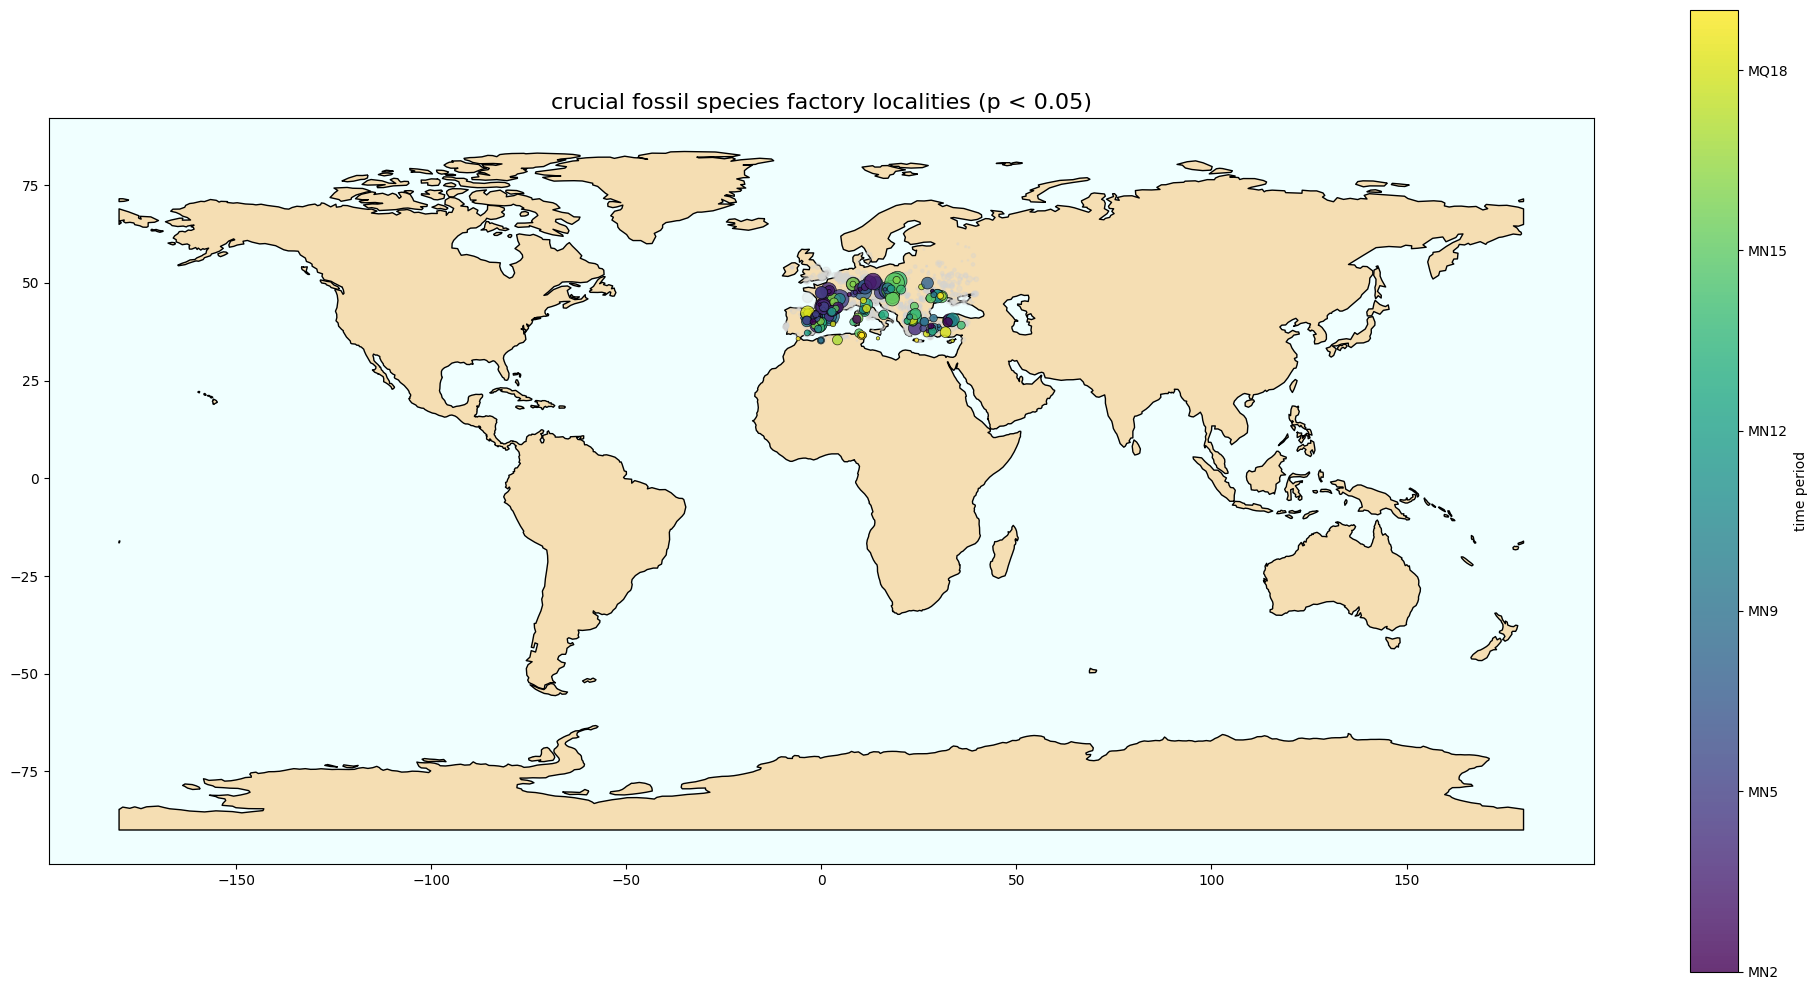

In [58]:
import matplotlib.colors as mcolors

fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.flatten()
norm = mcolors.LogNorm(vmin=0.00001, vmax=1)

for i, unit in enumerate(mnseq[2:19]):
    if i < len(axes):
        ax = axes[i]
        datunit = eurolocal[eurolocal['MN_UNIT'] == unit]
        world.plot(ax=ax, color='wheat', edgecolor='black')
        ax.set_facecolor('azure')
        if len(datunit) > 0:
            scatter = ax.scatter(
                datunit['LONG'], 
                datunit['LAT'],
                s=datunit['all_occurrences'] * 2,
                c=datunit['p_value'],
                cmap='plasma_r',
                norm=norm,
                alpha=0.7
            )
            sigpoint = datunit[datunit['p_value'] < 0.05]
            if len(sigpoint) > 0:
                ax.scatter(
                    sigpoint['LONG'],
                    sigpoint['LAT'],
                    s=sigpoint['all_occurrences'] * 3,
                    facecolor='none',
                    edgecolor='black',
                    linewidth=1.5
                )
            ax.set_title(f'{unit} (n={len(datunit)}, sig={len(sigpoint)})')
        else:
            ax.text(0.5, 0.5, f"No data for {unit}", 
                   ha='center', va='center', transform=ax.transAxes,
                   fontsize=14, fontweight='bold', color='gray')
        ax.set_xticks([])
        ax.set_yticks([])

cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(scatter, cax=cax)
cbar.set_label('p-value')
valtick = [0.00001, 0.001, 0.01, 0.05, 0.1, 1.0]
cbar.set_ticks(valtick)
cbar.set_ticklabels(['<0.0001', '0.001', '0.01', '0.05', '0.1', '1.0'])

fig.suptitle('first occurrences by time period stats', fontsize=20, y=0.95)
plt.subplots_adjust(right=0.88, top=0.92, hspace=0.3, wspace=0.1)
plt.show()
fig, ax = plt.subplots(figsize=(20, 10))
world.plot(ax=ax, color='wheat', edgecolor='black')
ax.set_facecolor('azure')

ax.scatter(
    eurolocal['LONG'], 
    eurolocal['LAT'], 
    s=eurolocal['all_occurrences'], 
    c='lightgray',
    alpha=0.3
)

siglocs = eurolocal[eurolocal['p_value'] < 0.05]
scatter = ax.scatter(
    siglocs['LONG'],
    siglocs['LAT'],
    s=siglocs['all_occurrences'] * 3,
    c=siglocs['MN_UNIT'].map({unit: i for i, unit in enumerate(mnseq)}),
    cmap='viridis',
    edgecolor='black',
    linewidth=0.5,
    alpha=0.8
)

plt.title('crucial fossil species factory localities (p < 0.05)', fontsize=16)
cbar = plt.colorbar(scatter)
cbar.set_label('time period')
postick = [mnseq.index(unit) for unit in mnseq[2:19:3]]
cbar.set_ticks(postick)
cbar.set_ticklabels([unit for unit in mnseq[2:19:3]])
plt.tight_layout()
plt.show()

There are some patterns in fossil species factory localities from statistically significant first occurences in Europe. First of all, significant specie localities are concentrated in some time periods like MN3-MN6 and MN13-MN16. Timewise, this shows that different species emerged not continuously. Location-wise, the significant localities aren't distributed evenly as well. For instance, species are clustered in the Iberia, across multiple time periods. Central Europe was important in MN3-MN5. Furthermore, there were significant fossil specie localities in the Medditeranian in later time periods such as MN13-M15. An interesting observation can be that some localities with few occurences has high statistical significance and vice versa. This indicates that the sample size alone doesn't mean that place was a 'species factory'. Moreover, the significant localities happen in eographical borders, so maybe the ecological changes (mountain ranges, coastlines, and migration corridors.) may have caused the diversification of the species.